In [3]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

Встановлюємо гіперпараметри:

In [4]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [5]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [6]:
len(input_train[0]), len(input_train[1]), len(input_train[2])  # Перевірка довжини перших трьох текстів

(218, 189, 141)

Передпроцесинг послідовних даних:

In [7]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [8]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
input_train.shape

(25000, 500)

Побудова простої моделі RNN:

In [10]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(input_dim=max_features, output_dim=32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [11]:
model.build(input_shape=(None, maxlen))

In [12]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [14]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.5521 - loss: 0.6739 - val_acc: 0.7939 - val_loss: 0.4754
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.7991 - loss: 0.4510 - val_acc: 0.8251 - val_loss: 0.3995
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.8592 - loss: 0.3415 - val_acc: 0.8485 - val_loss: 0.3520
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - acc: 0.8859 - loss: 0.3035 - val_acc: 0.8033 - val_loss: 0.4187
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - acc: 0.9057 - loss: 0.2525 - val_acc: 0.8597 - val_loss: 0.3482


Відображення результатів:

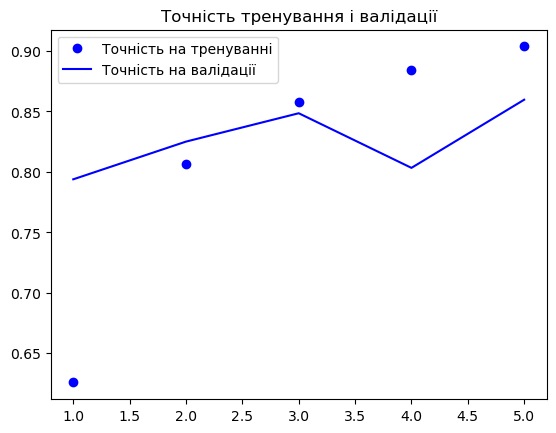

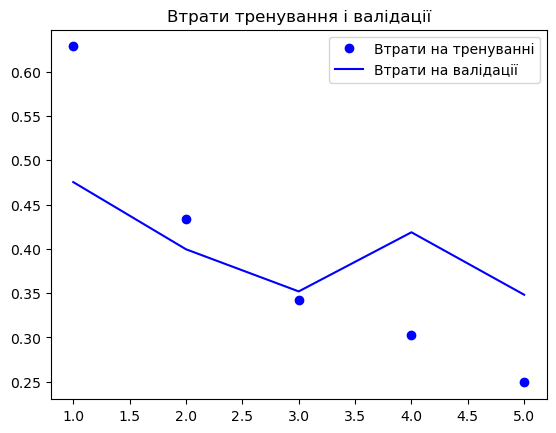

In [15]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [16]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8536 - loss: 0.3584
Test Loss: 0.35254040360450745
Test Accuracy: 0.8572400212287903


Analysis

Channel 1


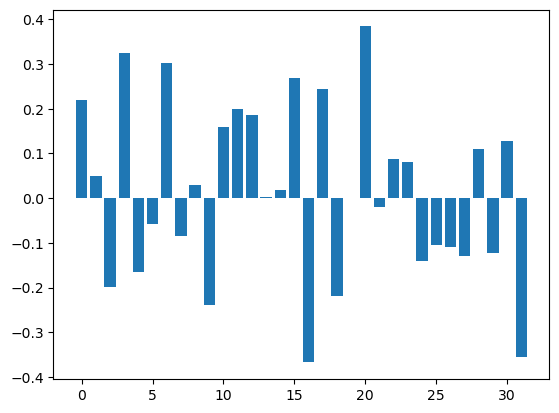

Channel 2


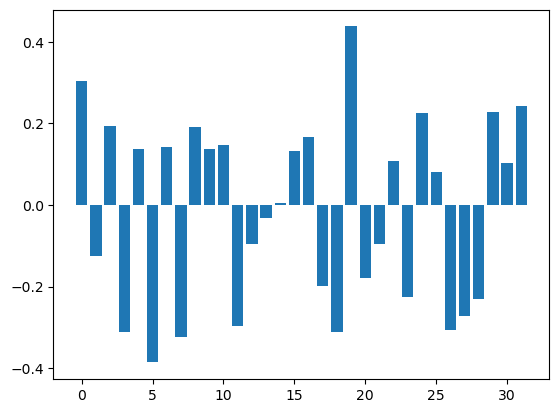

Channel 3


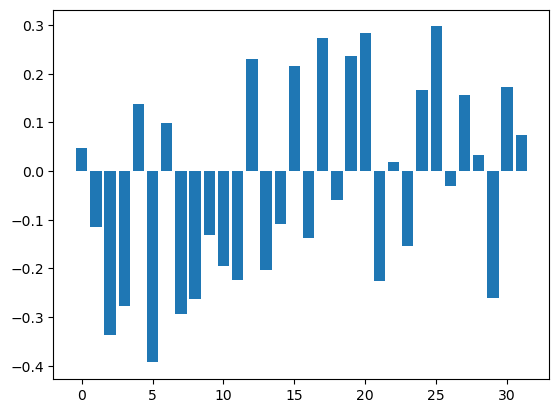

Channel 4


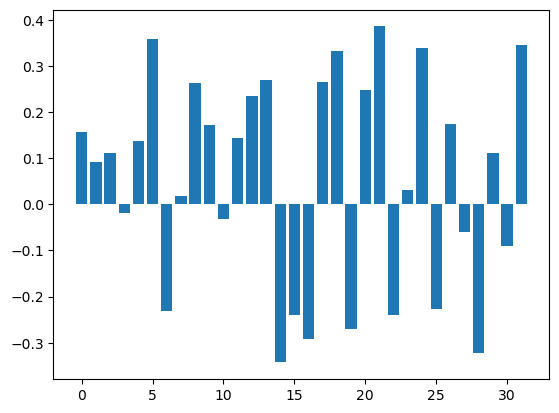

In [18]:
for i in range(4):
    print(f"Channel {i + 1}")
    plt.bar(range(32), model.layers[1].weights[0].numpy()[:,i])
    plt.show()

In [22]:
%load_ext tensorboard
import datetime, os
import tensorflow as tf
log_dir = os.path.join(
    "logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(input_train, y_train, epochs=50, batch_size=128, validation_split=0.3, callbacks=[tensorboard_callback])
# Запуск TensorBoard для візуалізації навчання
# Виконайте в терміналі команду: tensorboard --logdir=logs
# Потім відкрийте браузер і перейдіть за адресою http://localhost:6006/
# Це дозволить вам переглядати графіки та інші метрики навчання моделі
# Пам'ятайте, що для коректної роботи TensorBoard потрібно встановити бібліотеку TensorFlow та запустити сервер TensorBoard у терміналі.
# Якщо ви використовуєте Jupyter Notebook, ви можете запустити TensorBoard прямо в ньому, використовую
# %tensorboard --logdir logs
# Ця команда дозволить вам переглядати TensorBoard прямо в Jupyter Notebook без необхідності відкривати окремий браузер.
# Пам'ятайте, що для цього потрібно мати встановлену бібліотеку TensorFlow та Jupyter Notebook, а також запустити навчання моделі з параметром callbacks, що включає tensorboard_callback.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.9898 - loss: 0.0343 - val_acc: 0.8297 - val_loss: 0.5952
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.9947 - loss: 0.0201 - val_acc: 0.8360 - val_loss: 0.6343
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.9949 - loss: 0.0184 - val_acc: 0.8087 - val_loss: 0.7163
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - acc: 0.9970 - loss: 0.0128 - val_acc: 0.7695 - val_loss: 0.8469
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.9969 - loss: 0.0123 - val_acc: 0.8211 - val_loss: 0.7553
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - acc: 0.9958 - loss: 0.0137 - val_acc: 0.7581 - val_loss: 0.9410
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - acc: 0.9962 - loss: 0.0142 - val_acc: 0.8208 - val_loss: 0.8047
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - acc: 0.9964 - loss: 0.

In [30]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 53922), started 0:00:10 ago. (Use '!kill 53922' to kill it.)

In [32]:
model.layers[1](model.layers[0](input_train[:1]))

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 0.17373334,  0.02486494,  0.63382053, -0.40274495,  0.00617877,
         0.42961845,  0.40144885,  0.48907936, -0.25306937, -0.4230794 ,
        -0.1594225 ,  0.5969574 , -0.2033672 , -0.3240136 , -0.5001865 ,
        -0.5629297 , -0.5706772 , -0.53068584,  0.03447437,  0.03228166,
         0.55488557,  0.1678087 , -0.39845115,  0.36746278, -0.21302943,
        -0.6975337 ,  0.14043245, -0.4589363 , -0.74177957, -0.5884546 ,
        -0.06292217,  0.8761359 ]], dtype=float32)>

In [33]:
model.layers[1]

<SimpleRNN name=simple_rnn, built=True>